<a href="https://colab.research.google.com/github/SahmorieCameron/CQ-Bildung-ABI2022-1/blob/master/Notebooks/Sahmorie_Cameron_Klausur_2022.06.21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General Remarks

- Please complete all tasks (text and code) directly in this notebook
- Save the notebook with your first name and surname in the filename:  e.g. **Klausur_ThomasManke.ipynb**
- Submit as github repo (preferred), alternatively you can upload the notebook to the CQ portal (and share with me)
- This test will cover three parts: Markov chains, Hidden Markov Models, Artifical Neural Networks
- Each part will need their own and sometimes overlapping packages to import (e.g numpy). Even if it is redundant, import the relevant parts explicitly at the beginnig of each part.
- Complete the code cells in their respective sections and add (concise) text, where more verbal explanations are required. Comments in the code cells are also welcome.
- Feel free to add multiple code cells if you prefer, but make sure that they stay in their respective sections
- All tasks have been tested with mybinder.org and should run on any modern laptops (with 2 GB free RAM).
Make sure to switch off other resource hungry programs.
If you encounter any technical problems, please inform me immediately !
- Deadline for submission: **21.06. 2022 15:30**


---



# Markov Chains

##  The story: A ball game

Alice, Bob and young Clemens are playing a new ball game - here are the rules:
- If Alice has the ball, she will throw a (fair 6-sided) die and keep the ball if she throws a 6, otherwise she'll pass the ball to Bob
- If Bob has the ball, he'll pass it to Alice or Clemens, based on the throw of a fair coin
- If Clemens has the ball he'll return it to the child from whom he got it 

At the beginning of the game, their father throws the ball to Alice or Bob.
However, he is three times more likely to throw it to Alice, and he never throws it to Clemens.

## The Tasks

Translate the story into a Markov Model. 
Optionally: add a scanned drawing of the Markov graph as jpeg file to this notebook.

- What are the states and how many states are there?
- What is the initial state distribution ? Write it down as numpy.array below.
- Write down the transition matrix as numpy.array.
- Does the Markov Model have a stationary distribution - and does your answer depend on whether Alice has a fair die? 
- Validate your answer numerically with the "matrix power method". 
- For each child, give their long-term probabilities that they hold the ball. 
- Bonus: In the fair die scenario, what is the number of steps that Alice can expect to hold the ball before having to pass it on. 

## Your solutions

012100012101210101012101010121210121001001010101212121210101012101010121012121001210101210012121210001


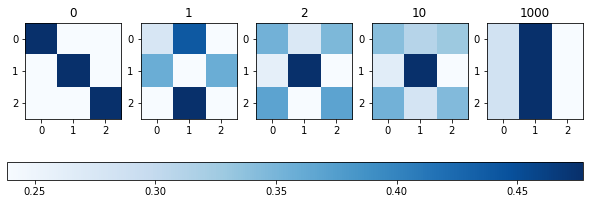

Alice: expected duration: 1.1904761904761905 average: 1.380952380952381
Bob: expected duration: 1.0 average: 1.0
Clemens: expected duration: 1.0 average: 1.0


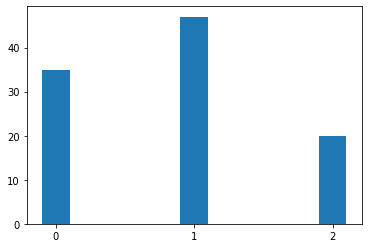

In [95]:
# import the necessary modules
import numpy as np
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt

np.random.seed(42)

def generate_sequence(P, s=0, T=100):
    states_amt = P.shape[0]
    if s>=states_amt:
        raise Exception('starting state not within probability matrix')
    else:
        assert P.shape[0]==P.shape[1],         "P should be a squared matrix"
        assert np.allclose( P.sum(axis=1), 1), "P should be a stochastic matrix"
    history = [ s ]
    for i in range(T+1):
        X1= np.random.choice(a=states_amt, p=P[history[-1]])
        history.append(X1)
    return(history)


#Transition Matrix
P = np.array(
    [[0.16,0.84,0],
     [0.5, 0, 0.5],
     [0, 1, 0],
    ]
)

#Initial State Distribution
ip=np.array([0.75,0.25,0]) #initial probability

#Markov Chain Generation
X=generate_sequence(P, np.random.choice(3, p=ip), T=100)
print(*X, sep='')

#Does the Markov Model have a stationary distribution - 
#and does your answer depend on whether Alice has a fair die?

def plot_transition_matrix(P, tmax=100):

  # some sanity checks
  assert P.shape[0]==P.shape[1],         "P should be a squared matrix"
  assert np.allclose( P.sum(axis=1), 1), "P should be a stochastic matrix"

  fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
  i=0
  for t in [0,1,2,10,tmax]:
    S=matrix_power(P,t)
    im=ax[i].imshow(S, cmap=plt.cm.Blues)
    ax[i].set_title(t)
    i = i + 1
  cax = fig.add_axes([0.1, 0.2, 0.8, 0.05])
  fig.colorbar(im, cax=cax, orientation='horizontal')
  plt.show()

#######

plot_transition_matrix(P, 1000)

#######

#pi_t = np.dot(pi_0, matrix_power(P,t) ) # the same as line above but more clear
# print('given that we have an 90% probability to start in state A and 10% chance to start in state B, ')
# print('we will end with a prob of in state \n      A   or   B')
# print(pi_t)
# print(f'after{t} steps')

#For each child, give their long-term probabilities that they hold the ball.

def StateDuration(L, s=0):
  # helper function to calculate the "duration" of a given element s in list L
  # --> calculate the length of consecutive occurences
  count=0
  res=[]
  for e in L:
    if e==s:
      count +=1
    else:
      if (count > 0):
        res.append(count)
      count=0

  if (count>0):
    res.append(count)
  return res


states, counts = np.unique(X, return_counts=True)
B = plt.bar(states.astype(str), counts, align='center', width=0.2)

i=[0,1,2]                                   # chose states

X=generate_sequence(P, T= 500)

for j in i:
    exp = 1/(1-P[j,j]) # expected duration
    res = StateDuration(X, s=j)
    if j == 0:
      print('Alice: expected duration: {} average: {}'.format(exp, sum(res)/len(res)))
    elif j==1:
      print('Bob: expected duration: {} average: {}'.format(exp, sum(res)/len(res)))
    elif j==2:
      print('Clemens: expected duration: {} average: {}'.format(exp, sum(res)/len(res)))


Your verbal answers here:


**What are the states and how many states are there?**

There are 4 states, Father (0), Alice (1), Bob (2) and Clemens (3).

**For each child, give their long-term probabilities that they hold the ball.**


**In the fair die scenario, what is the number of steps that Alice can expect to hold the ball before having to pass it on.**

1.19



# Hidden Markov Models

## A story

Let a hidden Markov Model be specified by the following state transition probabilities and emission probabilities.

\begin{align}
  P & = 
  \begin{bmatrix} 
      0.75 & 0.25 & 0.00  \\ 
      0.00 & 0.90 & 0.10  \\
      0.20 & 0.00 & 0.80  
  \end{bmatrix} 
  \\ \\
  E & = 
    \begin{bmatrix} 
      0.00 & 0.50 & 0.50 & 0.00 \\ 
      0.25 & 0.25 & 0.25 & 0.25 \\
      0.50 & 0.00 & 0.00 & 0.50 
    \end{bmatrix} 
\end{align}





## Tasks

1. The initial state probability $\pi$ is not given, but you may assume that it is the stationary distribution of state transitions - calculate it and report it.

2. Using MultinomialHMM() from the hmmlearn package, set up a probabilistic model with the parameters $(\pi, P, E)$.

3.  Sample a sequence of 2000 hidden states $Z$ and the corresponding observations $X$ from the model. Use a random seed = 42 for reproducibility.
Report the first 20 pairs of hidden states and observations.


4. Calculate the logarithm of the probability $\log Pr(X)$ given the model from which you generated $X$ - why is it so low (1-2 sentences)?

5. Name two algorithms to decode the "best" possible path of hidden states $Z$ from observations $X$ and a given model. Briefly describe their different goals (2 sentences).
Run the respective function from hmmlearn to calculate 
$Z$ for both methods, given the $X$ and the current model.
Save the result as $Z_1$ and $Z_2$.
Report the number of differences between $Z_1$ and $Z_2$.

6. Use the hmmlearn implementation of the Baum-Welch algorithm to determine the best parameters for the HMM model, if only $X$ is given. 
  - You will have to define a new model that does not yet know any parameters (e.g. model_fit). 
  - You may assume that the number of hidden states is known to be 3.
  - Set "np.random.seed(1)" and run 500 iterations. 
  - Compare the results with your knowlegde of parameters from the generating model for $X$. You might want to round the fitted parameters to two digits: np.round(...,2)
  - Comment on possible difference and name two ways in which you might improve the parameter fit.

## Load the Software

In [1]:
# install hmmlearn (if necessary)
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 129 kB 9.5 MB/s 


In [54]:
# import modules you need
import numpy as np
import matplotlib.pyplot as plt
import pickle
from hmmlearn import hmm

## Your solution

In [91]:
P = np.array([
 [0.75, 0.25, 0.0],
 [0.0, 0.9, 0.1],
 [0.2, 0.0, 0.8]   
])
E = np.array([
    [0.0, 0.5, 0.5, 0.0],
    [0.25, 0.25, 0.25, 0.25],
    [0.5, 0.0, 0.0, 0.5],
]) 

# stationary distribution

def get_stationary(n):
    row = n
    pi = np.full((1, row), 1 / row)
    while True:
        new_pi = np.dot(pi, P)
        if np.allclose(pi, new_pi):
            return pi 
            break
        pi = new_pi
print(get_stationary(3))

# # define model
model_gen = hmm.MultinomialHMM(n_components= 3)

# set parameters
model_gen.startprob_ = pi                      # initial state prob
model_gen.transmat_  = P                       # transition prob
model_gen.emissionprob_ =  E                   # emission prob

# sample from model

X,Z = model_gen.sample(2000)

print('Z=', *Z[:20])
print('X=', *X.flatten()[:20])

# log P(X)
score = model_gen.score(X)
print('log P(X) = ', score)

# # two ways to predict best path

_, Z1 = model_gen.decode(X, algorithm='viterbi')
# The Viterbi algorithm computes the most probably sequence of states,
# from the specified HMM given the emissions.

_, Z2 = model_gen.decode(X, algorithm='map')
# The Maximal posterior function computes the marginal conditional distributions,
# or the most likely state at each position.

# # differences between two paths Z1 and Z2
print('differences (Zv-Zm): ', np.sum(Z1 != Z2))
print("")


# new model for fit
np.random.seed(1)
model_fit = hmm.MultinomialHMM(n_components=3, n_iter=500)
model_fit.fit(X)
score = model_fit.score(X)

# print results
print('fit score:    ', score )
print('fitted P: \n', np.round(model_fit.transmat_,2))
print('known P: \n', P)
print('\n')
print('fitted E: \n'  , np.round(model_fit.emissionprob_,2))
print('know E: \n', E)


[[0.21053201 0.52630465 0.26316334]]
Z= 0 0 0 0 1 1 1 1 1 1 2 2 2 0 1 1 1 2 2 0
X= 2 2 2 1 3 2 3 0 3 1 3 0 3 2 2 3 1 0 0 2
log P(X) =  -2635.402164301462
differences (Zv-Zm):  268

fit score:     -2771.4043080021916
[[0.28605087 0.36781472 0.34613441]
 [0.31679579 0.3485149  0.33468931]
 [0.29675126 0.34686964 0.35637911]]
fitted P: 
 [[0.29 0.37 0.35]
 [0.32 0.35 0.33]
 [0.3  0.35 0.36]]
known P: 
 [[0.75 0.25 0.  ]
 [0.   0.9  0.1 ]
 [0.2  0.   0.8 ]]


fitted E: 
 [[0.35 0.46 0.   0.18]
 [0.2  0.09 0.38 0.33]
 [0.2  0.21 0.33 0.25]]
know E: 
 [[0.   0.5  0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.   0.5 ]]


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:562: ComplexWarning: Casting complex values to real discards the imaginary part
  log_frameprob)
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:549: ComplexWarning: Casting complex values to real discards the imaginary part
  log_frameprob)
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:562: ComplexWarning: Casting complex values to real discards the imaginary part
  log_frameprob)
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:575: ComplexWarning: Casting complex values to real discards the imaginary part
  log_frameprob)


# Artificial Neural Networks




## The Data

The MINST-Fashion dataset contains a large number of (small and coarse-grained) images from fashion items. This set has been annotated with labels for both traing and test data sets.

Link: https://www.tensorflow.org/datasets/catalog/fashion_mnist

The goals is to construct a Neural Network that can predict the fashion label from a given image.

The sections below will describe the individual tasks.

## Load Packages

In [135]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print('tf-version: ', tf.__version__)

# my plot function for confusion matrix
def plot_cm(mat):
  classes = np.arange(cm.shape[0])
  plt.imshow(mat, cmap=plt.cm.Blues)
  for (j,i),label in np.ndenumerate(mat):
    plt.text(i,j,np.round(label,2),ha='center',va='center')

  plt.colorbar()
  plt.title('Confusion Matrix')
  plt.xlabel('True label')
  plt.ylabel('Pred label')
  plt.xticks(classes)
  plt.yticks(classes)
  plt.show()

tf-version:  2.8.2


## Load Data

This section is given purposefully. Simply run it to get train and test data together with the respective labels. 

Also keep the normalization as is.

In [115]:
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalization
X_train, X_test = X_train / 255.0, X_test / 255.0

## Data Exploration and Preprocessing

- How many images (=samples) are included in the training data? 
- What is the shape of these images?
- How many distinct labels does it have? 

In [127]:
print('Images and their shape:     ', X_train.shape)
print('Distinct labels:     ', nc)  

nc = np.unique(y_train).size     # number of classes / labels in training set
l_name = 'sparse_categorical_crossentropy'
a_name = 'sparse_categorical_accuracy'

Images and their shape:      (60000, 28, 28)
Distinct labels:      10


## Define Model and Learning Strategy

Construct an artifical neural network with

- an input layer that takes the proper shape of images
- a dense layer with 128 nodes including a 'ReLu' activation function for non-linear mapping 
- an output layer corresponding to the number of classes in the problem and a softmax activation function

Use the Adam optimizer and define a suitable loss function.
Make sure that during the learning process you will track both loss and 'sparse_categorical_accuracy' as metrics.

Summarize the model. How many parameters does it have?

In [129]:
# Define Model and Learning strategy here
nc = np.unique(y_train).size     # number of classes / labels in training set
l_name = 'sparse_categorical_crossentropy'
a_name = 'sparse_categorical_accuracy'
input_shape = X_train.shape[1:]

print('X_train.shape:     ', X_train.shape)
print('input_shape:       ', input_shape)
print('number of classes: ', nc)

mod1 = tf.keras.Sequential( name = 'mnist_model_1')
mod1.add( tf.keras.layers.Flatten(input_shape=input_shape) )  # flattens input to vector 
mod1.add( tf.keras.layers.Dense(128, activation='relu',name='1st_layer') )  # add layer with 128 nodes + relu
mod1.add( tf.keras.layers.Dense(nc, activation='softmax', name='softmax_layer') )
mod1.compile(optimizer='adam', loss=l_name, metrics=a_name)

mod1.summary()

#Model has 101,770 params.

X_train.shape:      (60000, 28, 28)
input_shape:        (28, 28)
number of classes:  10
Model: "mnist_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 softmax_layer (Dense)       (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Fit the Model

Fit the model to the training data for 10 epochs - 
use 10% of the ttraining data for validation.

Once the fit is finished you may save the model.

In [132]:
fh1 = mod1.fit(X_train, y_train, epochs=10, verbose=0, validation_split=0.1)

model_fn   = 'minst_model.h5'   
history_fn = 'minst_history.npy'
mod1.save(model_fn)
np.save(history_fn, fh1)   # fh1 has type keras.callbacks.History

INFO:tensorflow:Assets written to: ram://1dd9c94c-761c-4f8c-aaf7-e878cfd28de4/assets


## Evaluate the Model

Plot the history of loss and accuracy for the training and validation set and compare it the same metrics obtained (after fitting) for the test data.

Are there any indications for overfitting - explain this briefly (1-2 sentences).

In [133]:
# Evaluation & Learning history
def plot_fit_history(fh, name='loss', test_score=0):
  
  if name not in fh.history:
      print('plot_fit_history: {} is not a key in history !'.format(name))
      return
  val_name = 'val_' + name
  plt.plot(fh.history[name],     label='train')

  if val_name in fh.history:
    # add validation if in data
    plt.plot(fh.history[val_name], label='valid')
  
  plt.axhline(y=test_score, color='green', linestyle='-.',label = 'test')
  plt.xlabel('Epoch')
  plt.ylabel(name)
  plt.legend(loc='upper left')
  plt.show()

test_loss, test_acc = mod1.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.3633 - sparse_categorical_accuracy: 0.8877


## Inspect predictions

Inspect the training image with index 43 and compare the predicted label with the true label.

Compare all predicted label from the training set with all true labels - you may want to use the plot_cm() funcion defined above.

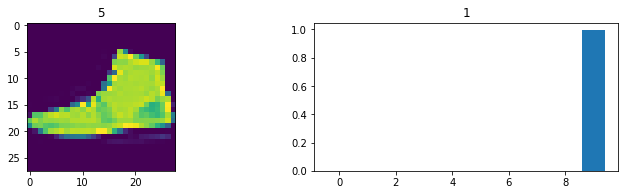

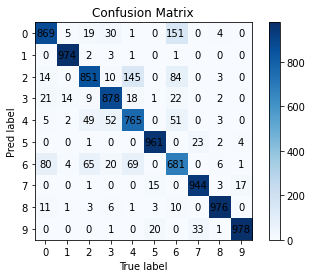

In [150]:
from tensorflow.keras.preprocessing import image

id=43

#... prediction and inspection for one test image
mod1_pred = mod1.predict(X_test)           # probabilities    
X = X_test[id]
X = np.expand_dims(X, axis=0)

i_max=np.argmax(mod1_pred)
true_lab=y_train[[id][0]]
pred_lab=y_train[i_max]

plt.figure(figsize=(12,6))
ax = plt.subplot(2,2,1)
plt.imshow(X_test[id])
plt.title(true_lab)

ax = plt.subplot(2,2,2)
plt.bar(range(10), mod1_pred[0])
plt.title(pred_lab)
plt.show()

#... predictions for all test images
y_pred    = np.argmax(mod1_pred, axis=1)   


#... obtain confusion matrix ...
cm=confusion_matrix(y_pred, y_test)
plot_cm(cm)

## Suggestions for improvements

Make suggestions for possible improvements to the model and the fitting process

- 
-
-
